# Project III

##### Contributors: Armand Sandvik (245472), Eirik Søyland (244724) and Jørund Eldøy (274351)

### Abstract

### Introduction

### Topic 1)

#### Task 0:

In [1]:
from project_3 import Monte_Carlo_simulations

monte_carlo = Monte_Carlo_simulations([-1, -1, -1], [1, 1, 1])

#### Task 1:

In [2]:
point = monte_carlo.place_random_point()
print(point)

[-0.37875233 -0.18351167  0.72608563]


#### Task 2:

In [3]:
center, radius = monte_carlo.place_random_sphere()
print(f"Center of the sphere has x, y, z coordinates: {center}, and radius {radius}")

Center of the sphere has x, y, z coordinates: [-0.57112686 -0.74315756  0.64725664], and radius 0.17763284126914342


#### Task 3:

In [4]:
print(monte_carlo.in_sphere(point, center, radius))

False


#### Task 4:

The estimated volume of the sphere is (0.023822222222222224 ± 0.00284789101256607) for 95% CI. 
And we can compare to the analytical expression which gives us 0.023477853954090088. 
There were 268 hits out of 90000 points.


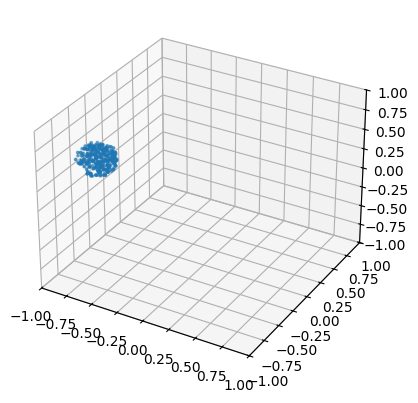

In [5]:
n_points = 90000
points_inside, fraction = monte_carlo.calculate_fraction_of_points(n_points, center, radius)

est_volume, std_err = monte_carlo.calculate_accuracy(n_points, fraction)
true_volume = monte_carlo.calculate_analytical(radius)

print(f"The estimated volume of the sphere is ({est_volume} ± {1.96 * std_err}) for 95% CI. \nAnd we can compare to the analytical expression which gives us {true_volume}. \nThere were {len(points_inside)} hits out of {n_points} points.")

monte_carlo.plot_3d(points_inside)


#### Task 5:

$$ V_{sphere} = \frac{4}{3} \cdot \pi \cdot r^3$$
$$\pi = \frac{V_{sphere}}{\frac{4}{3} \cdot r^3}$$
$$\pi = \frac{3 \cdot V_{sphere}}{4 \cdot r^3}$$
$$ V_{sphere} = Volume \, of \, simulation \, area \cdot \frac{Number \, of \, hits}{Number \, of \, randomly \, generated \, points} $$

In [6]:
print(monte_carlo.estimate_pi(n_points, len(points_inside), radius))

3.187672879806759


#### Task 6:

In [7]:
spheres = []
for i in range(10):
    center, radius = monte_carlo.place_random_sphere()
    spheres.append([center, radius])
    print(f"Center of the sphere {i+1} has x, y, z coordinates: {center}, and radius {radius}")

Center of the sphere 1 has x, y, z coordinates: [ 0.33094428 -0.45577899 -0.62459368], and radius 0.36292114719503904
Center of the sphere 2 has x, y, z coordinates: [0.88490058 0.92060481 0.16747425], and radius 0.058537186551636596
Center of the sphere 3 has x, y, z coordinates: [ 0.82849337  0.06290889 -0.71006469], and radius 0.01272510704189096
Center of the sphere 4 has x, y, z coordinates: [ 0.07208376  0.00089026 -0.84144955], and radius 0.06453910223200855
Center of the sphere 5 has x, y, z coordinates: [ 0.95764386 -0.19024136 -0.45053719], and radius 0.015244392738516636
Center of the sphere 6 has x, y, z coordinates: [-0.09583606 -0.00483257 -0.91229773], and radius 0.048667087037381145
Center of the sphere 7 has x, y, z coordinates: [ 0.06625665 -0.12269779  0.94639093], and radius 0.0269680639454035
Center of the sphere 8 has x, y, z coordinates: [ 0.12389136 -0.03102836 -0.23940539], and radius 0.25738490899809247
Center of the sphere 9 has x, y, z coordinates: [-0.83198

#### Task 7:

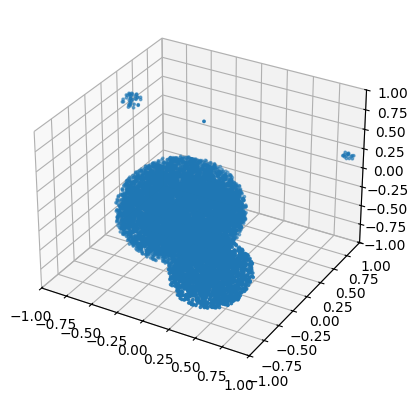

In [8]:
import numpy as np

accumulated_hits, accumulated_frac = [], []
for _ in range(n_points):
    point = monte_carlo.place_random_point()
    for sphere in spheres:
        center, radius = sphere[0], sphere[1]
        if monte_carlo.in_sphere(point, center, radius):
            accumulated_hits.append(point)
            break

monte_carlo.plot_3d(np.array(accumulated_hits))

In [ ]:
fraction = len(accumulated_hits) / n_points
est_volume, std_err = monte_carlo.calculate_accuracy(n_points, fraction)

accumulated_volume = []
for sphere in spheres:
    center, radius = sphere[0], sphere[1]
    accumulated_volume.append(monte_carlo.calculate_analytical(radius))

print(f"The estimated volume of the spheres is ({est_volume} ± {1.96 * std_err}) for 95% CI. \nAnd we can compare to the analytical expression which gives us {sum(accumulated_volume)}. \nThere were {len(accumulated_hits)} hits out of {n_points} points.")

0.20022828813338567
0.0008402028399581898
8.631235017513462e-06
0.0011260492066326394
1.4839490700896008e-05
0.0004828304667843561
8.215574101496445e-05
0.07142296061301018
0.0035199214929267893
0.7622464380090695
The estimated volume of the spheres is (1.4104 ± 0.042251462827069076) for 95% CI. 
And we can compare to the analytical expression which gives us 1.0399723172285007. 
There were 3526 hits out of 20000 points.


At some points the ``accumulated_volume`` will go larger than ``est_volume`` ± ``1.96 * std_err`` because we don't count for overlapping spheres in our volume calculation. So in some simulations there will be several overlapping spheres that gets accounted for in the estimated volume, but not in the analytical volume accumulations.

#### Task 8:

In [10]:
dna = []
with open("dna_coords.txt", "r") as f:
    for line in f:
        line = line.split()
        coordinates = np.array((float(line[1])/10, float(line[2])/10, float(line[3])/10))
        radius = monte_carlo.translate_periodic_table(line[0])
        dna.append([coordinates, radius])

We have made an array with grouped coordinates and radius of each atom in the dna-strand. Where the first element is a numpy array of (x, y, z)-coordinates and the second element is the atomic radius.

#### Task 9:

In [11]:
dna_monte_carlo = Monte_Carlo_simulations([-5, -2, -1], [-3, 0.5, 1])
print(f"{dna[0][0]} [nm], {dna[0][1]} [nm]")

[-4.818074  0.174518 -0.122092] [nm], 0.12 [nm]


We've created a new instance of the class which has the simulation box of size -5 to 5 nanometers in each axis. We have transformed the coordinates fron Angstrom to nanometers, and the atomic radius from picometers to nanometers. 

#### Task 10:

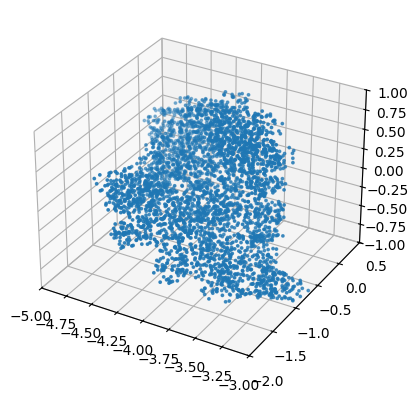

In [12]:
n_points = 20000
accumulated_hits, accumulated_frac = [], []
for _ in range(n_points):
    point = dna_monte_carlo.place_random_point()
    for atom in dna:
        coordinate, radius = atom[0], atom[1]
        if dna_monte_carlo.in_sphere(point, coordinate, radius):
            accumulated_hits.append(point)
            break

dna_monte_carlo.plot_3d(np.array(accumulated_hits))


In [22]:
fraction = len(accumulated_hits) / n_points
est_volume, std_err = dna_monte_carlo.calculate_accuracy(n_points, fraction)

accumulated_volume = []
for atom in dna:
    radius = atom[1]
    accumulated_volume.append(dna_monte_carlo.calculate_analytical(radius))

print(f"The estimated volume of the spheres is ({est_volume} ± {1.96 * std_err}) for 95% CI. \nAnd we can compare to the analytical expression which gives us {sum(accumulated_volume)}. \nThere were {len(accumulated_hits)} hits out of {n_points} points.")

The estimated volume of the spheres is (1.7630000000000001 ± 0.05281432853383635) for 95% CI. 
And we can compare to the analytical expression which gives us 3.6722768725392605. 
There were 3526 hits out of 20000 points.


### Topic 2)

#### Task 1:

#### Task 2:

#### Task 3:

#### Task 4:

#### Task 5:

### Summary/conclusion

### Self-reflection

### Bibliography